Importing the Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import plotly.express as px

# Data Collection and Analysis

In [3]:
# loading the data from xlsx file
insurance_dataset = pd. read_excel('Health_insurance_cost.xlsx')

In [5]:
insurance_dataset.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [6]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [7]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


Categorical Features


*   sex
*   smking_status
*   location





In [43]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1308.000000,1336.00000,1313.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.164373,0.50524,30.631158,1.094311,0.204341,1.514970,13268.527719
std,14.063732,0.50016,6.105017,1.206138,0.403370,1.104875,12112.797724
min,18.000000,0.00000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,26.000000,0.00000,26.200000,0.000000,0.000000,1.000000,4744.325050
50%,39.000000,1.00000,30.305000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.00000,34.580000,2.000000,0.000000,2.000000,16604.302645
max,64.000000,1.00000,53.130000,5.000000,1.000000,3.000000,63770.428010


<ipython-input-44-28228e9c3528>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


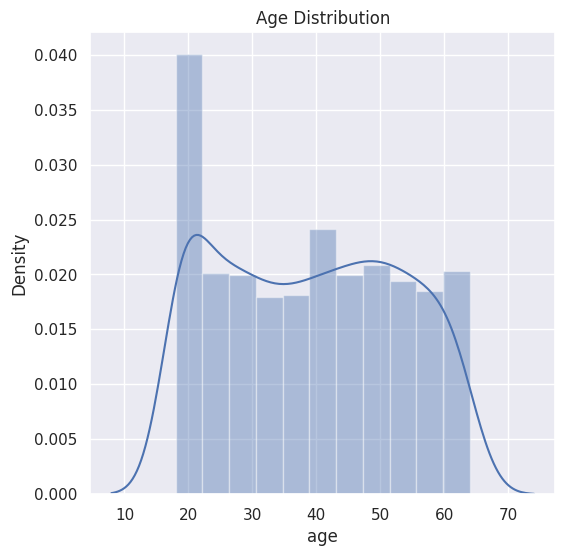

In [44]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

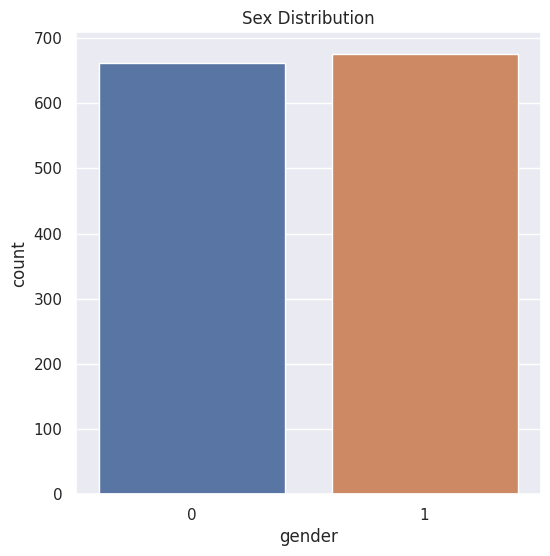

In [46]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='gender', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [48]:
insurance_dataset['gender'].value_counts()

1    675
0    661
Name: gender, dtype: int64

<ipython-input-50-636cb65d0007>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['BMI'])


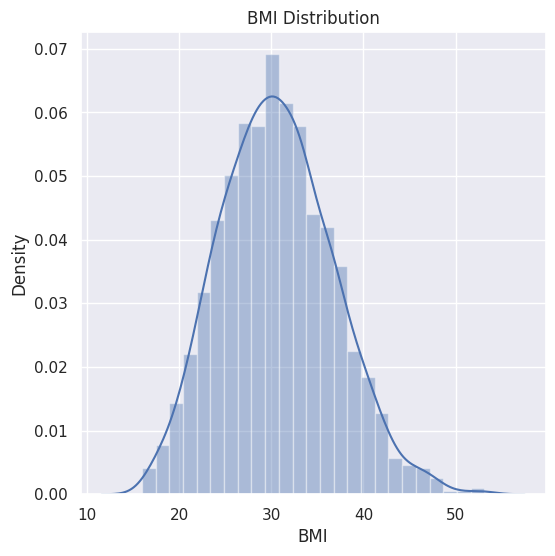

In [50]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['BMI'])
plt.title('BMI Distribution')
plt.show()

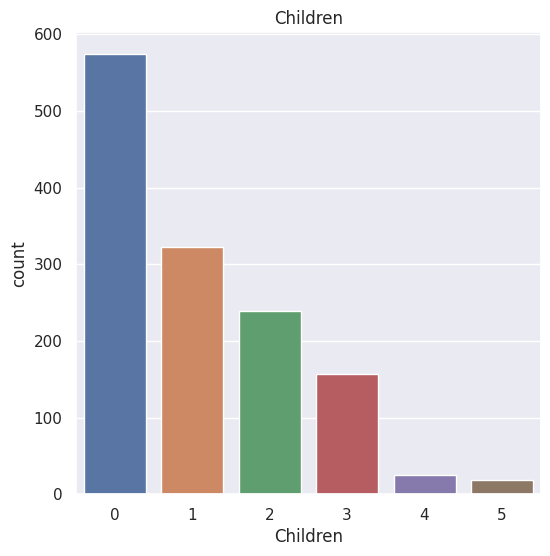

In [51]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='Children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [52]:
insurance_dataset['Children'].value_counts()

0    574
1    323
2    239
3    157
4     25
5     18
Name: Children, dtype: int64

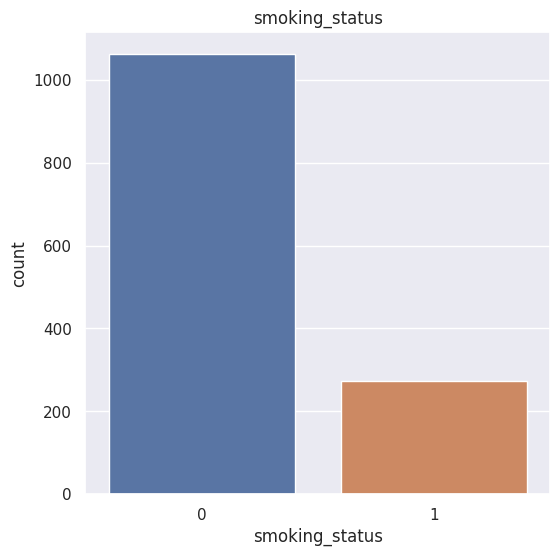

In [53]:
# smoking_status column
plt.figure(figsize=(6,6))
sns.countplot(x='smoking_status', data=insurance_dataset)
plt.title('smoking_status')
plt.show()

In [54]:
insurance_dataset['smoking_status'].value_counts()

0    1063
1     273
Name: smoking_status, dtype: int64

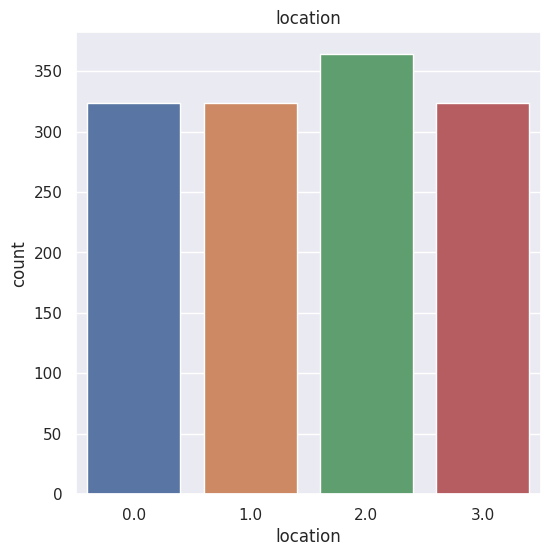

In [55]:
# location column
plt.figure(figsize=(6,6))
sns.countplot(x='location', data=insurance_dataset)
plt.title('location')
plt.show()

In [57]:
insurance_dataset['location'].value_counts()

2.0    364
3.0    324
1.0    324
0.0    324
Name: location, dtype: int64

<ipython-input-58-2d4c785bf2d9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['health_insurance_price'])


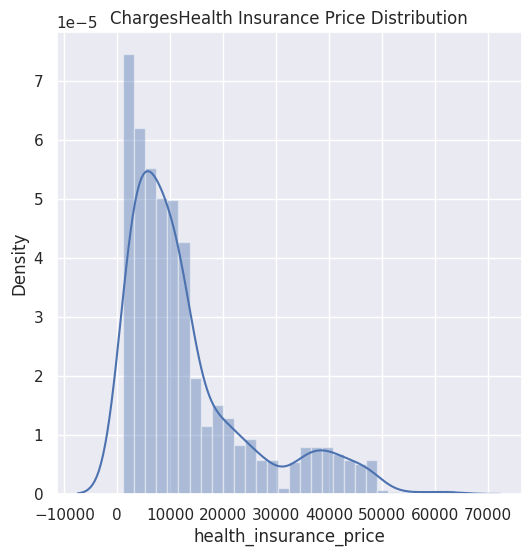

In [58]:
# distribution of health_insurance_price value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['health_insurance_price'])
plt.title('ChargesHealth Insurance Price Distribution')
plt.show()

## Dealing with missing values

In [8]:
# checking for missing values
insurance_dataset.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64




1. There are missing values present in few columns
2. age, BMI and health_insurance_price columns have null values




In [9]:
insurance_dataset.shape # Rechecking the number of observations and variables in the dataset

(1338, 7)

In [10]:
insurance_dataset.describe(include = 'all')

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


In [12]:
insurance_dataset.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [14]:
insurance_dataset.isnull().sum() # checking total number of missing values in each column

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [15]:
# checking if one observation has missing values more than 1
Missing_I = insurance_dataset.isnull().sum(axis = 1)
Missing_I = Missing_I[Missing_I > 1]
Missing_I

Series([], dtype: int64)

There are no more than 1 mssing values in any observation.

In [16]:
# exploring all rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(insurance_dataset)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.924000
1,18.0,male,33.770,1,no,southeast,1725.552300
2,28.0,male,33.000,3,no,southeast,4449.462000
3,33.0,male,22.705,0,no,northwest,21984.470610
4,32.0,male,28.880,0,no,northwest,3866.855200
5,31.0,female,25.740,0,no,southeast,3756.621600
6,46.0,female,33.440,1,no,southeast,8240.589600
7,37.0,female,27.740,3,no,northwest,7281.505600
8,37.0,male,29.830,2,no,northeast,6406.410700
9,60.0,female,25.840,0,no,northwest,28923.136920


<Axes: >

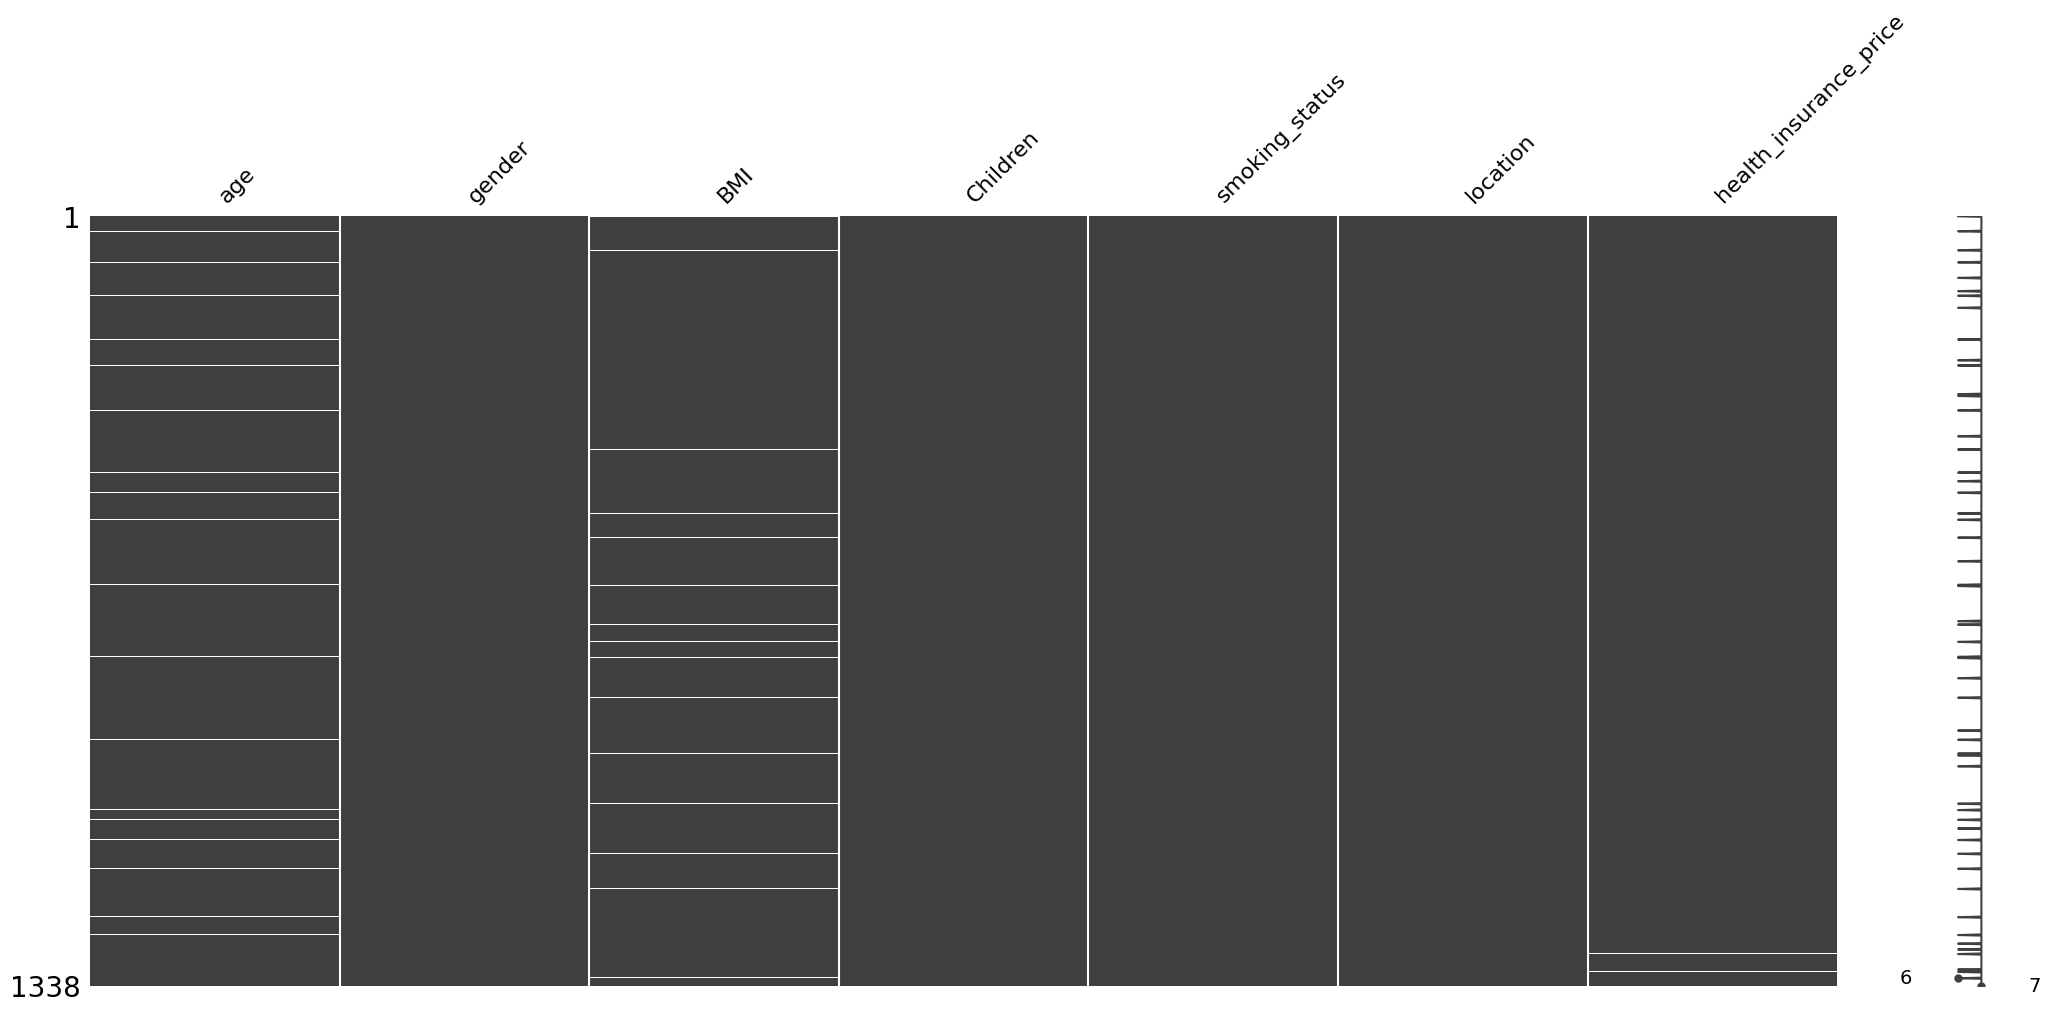

In [17]:
# visualization of missing values
import missingno as msno
msno.matrix(insurance_dataset)


1. age column has more missing values.
2. Either we can remove them or replace with something like mean or median too.
3. health_insurance_price column has some missing values. We have to remove it as it is labelled column.



In [20]:
# Dropping the null values from target variable
insurance_dataset.drop(insurance_dataset[insurance_dataset['health_insurance_price'].isnull()].index,axis=0, inplace=True)

In [21]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1308 non-null   float64
 1   gender                  1336 non-null   object 
 2   BMI                     1313 non-null   float64
 3   Children                1336 non-null   int64  
 4   smoking_status          1336 non-null   object 
 5   location                1336 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.5+ KB


# Before dealing with missing values we have to encode all categorical data

In [22]:
# Ordinal encoding for location
# we can also use regular expression too
from sklearn.preprocessing import OrdinalEncoder
Or_enc = OrdinalEncoder()
insurance_dataset[["location"]] = Or_enc.fit_transform(insurance_dataset[["location"]])

In [23]:
# label encoding for rest categorical variable
from sklearn.preprocessing import LabelEncoder

for col in ['gender','smoking_status']:
    insurance_dataset[col] = LabelEncoder().fit_transform(insurance_dataset[col])

In [24]:
insurance_dataset.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,NaN,0,1,3.0,16884.92400
1,18.0,1,33.770,1,0,2.0,1725.55230
2,28.0,1,33.000,3,0,2.0,4449.46200
3,33.0,1,22.705,0,0,1.0,21984.47061
4,32.0,1,28.880,0,0,1.0,3866.85520


In [25]:
# To avoid data leakage from outcome variable splitting the data set
Independent = insurance_dataset.drop('health_insurance_price',axis=1)
Independent.head()

,age,gender,BMI,Children,smoking_status,location
0,19.0,0,NaN,0,1,3.0
1,18.0,1,33.770,1,0,2.0
2,28.0,1,33.000,3,0,2.0
3,33.0,1,22.705,0,0,1.0
4,32.0,1,28.880,0,0,1.0


In [26]:
Dependent = insurance_dataset['health_insurance_price'] # creating Y variable only
Dependent.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: health_insurance_price, dtype: float64

In [34]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 15.9 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29898 sha256=a29197bcfdc36b2aabaa0ca3ec7e2240678f618104bae8c84c351096131a560c
  Stored in directory: /root/.cache/pip/wheels/f9/fc/6a/b0406b906bce293abe23c3b6da5a72637d2d04146ef1125a0b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11352 sha256=53aa3ad22796d32aba25c0304f743c6db645913981395580730eca803e312858
  Stored in directory: /root/.cache/pip/wheels/88/c4/be/e232c750d9bc360abf9a5e2cafe0d3e08e3605d2801bb11684
Successfully built fancyimpute knnimpute


In [35]:
from fancyimpute import KNN
knn_imputer = KNN()
Independent_knn = Independent.copy(deep=True)
Independent_knn.iloc[:, :] = knn_imputer.fit_transform(Independent_knn)

Imputing row 1/1336 with 1 missing, elapsed time: 0.471
Imputing row 101/1336 with 0 missing, elapsed time: 0.475
Imputing row 201/1336 with 0 missing, elapsed time: 0.477
Imputing row 301/1336 with 0 missing, elapsed time: 0.478
Imputing row 401/1336 with 0 missing, elapsed time: 0.479
Imputing row 501/1336 with 0 missing, elapsed time: 0.480
Imputing row 601/1336 with 0 missing, elapsed time: 0.481
Imputing row 701/1336 with 0 missing, elapsed time: 0.482
Imputing row 801/1336 with 0 missing, elapsed time: 0.484
Imputing row 901/1336 with 0 missing, elapsed time: 0.485
Imputing row 1001/1336 with 0 missing, elapsed time: 0.489
Imputing row 1101/1336 with 0 missing, elapsed time: 0.490
Imputing row 1201/1336 with 0 missing, elapsed time: 0.491
Imputing row 1301/1336 with 0 missing, elapsed time: 0.493


<ipython-input-35-10fccccf6861>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Independent_knn.iloc[:, :] = knn_imputer.fit_transform(Independent_knn)


In [36]:
# Imputation using MICE
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
Independent_MICE = Independent.copy(deep=True)
Independent_MICE.iloc[:, :] = MICE_imputer.fit_transform(Independent_MICE)

<ipython-input-36-207ab105cd50>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Independent_MICE.iloc[:, :] = MICE_imputer.fit_transform(Independent_MICE)


<Axes: xlabel='age', ylabel='Count'>

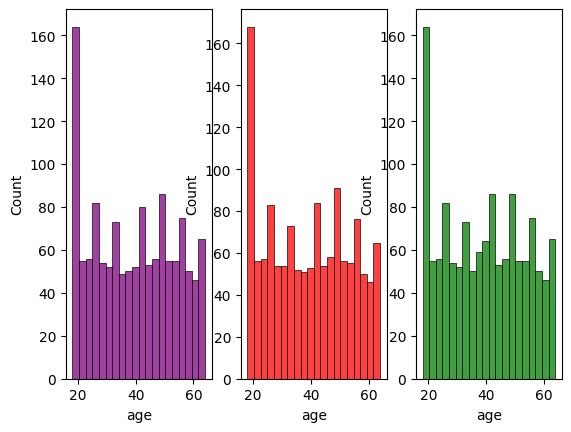

In [37]:
fig, ax =plt.subplots(1,3)
sns.histplot(insurance_dataset['age'],bins=20, color="purple", ax=ax[0])
sns.histplot(Independent_knn['age'], color="red", bins=20, ax=ax[1])
sns.histplot(Independent_MICE['age'], color="green", bins=20, ax=ax[2])

<Axes: >

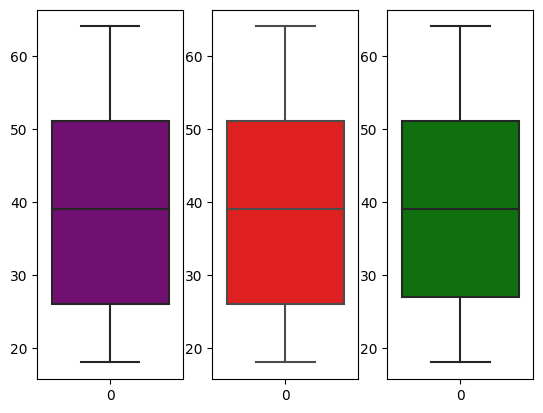

In [38]:
fig, ax =plt.subplots(1,3)
sns.boxplot(insurance_dataset['age'], color="purple", ax=ax[0])
sns.boxplot(Independent_knn['age'], color="red", ax=ax[1])
sns.boxplot(Independent_MICE['age'], color="green", ax=ax[2])

In [39]:
Independent_knn.describe() # using describe function to see if there is any discrepency in numerical measures 

,age,gender,BMI,Children,smoking_status,location
count,1336.000000,1336.00000,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.134418,0.50524,30.631464,1.094311,0.204341,1.514970
std,14.011080,0.50016,6.080546,1.206138,0.403370,1.104875
min,18.000000,0.00000,15.960000,0.000000,0.000000,0.000000
25%,26.000000,0.00000,26.200003,0.000000,0.000000,1.000000
50%,39.000000,1.00000,30.380000,1.000000,0.000000,2.000000
75%,51.000000,1.00000,34.488750,2.000000,0.000000,2.000000
max,64.000000,1.00000,53.130000,5.000000,1.000000,3.000000


In [40]:
Independent_MICE.describe() # using describe function to see if there is any discrepency in numerical measures 

,age,gender,BMI,Children,smoking_status,location
count,1336.000000,1336.00000,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.167466,0.50524,30.633462,1.094311,0.204341,1.514970
std,13.917334,0.50016,6.053449,1.206138,0.403370,1.104875
min,18.000000,0.00000,15.960000,0.000000,0.000000,0.000000
25%,27.000000,0.00000,26.315000,0.000000,0.000000,1.000000
50%,39.000000,1.00000,30.400000,1.000000,0.000000,2.000000
75%,51.000000,1.00000,34.430000,2.000000,0.000000,2.000000
max,64.000000,1.00000,53.130000,5.000000,1.000000,3.000000



1. From overall exploration it seems that MICE and KNN both performed well
2. Hence, I will go ahead with KNN imputation

In [41]:
insurance_dataset_miss = pd.concat([Independent_knn, Dependent], axis=1) # concatenating independent and dependent variable
insurance_dataset_miss.head(10)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0.0,26.200003,0.0,1.0,3.0,16884.92400
1,18.0,1.0,33.770000,1.0,0.0,2.0,1725.55230
2,28.0,1.0,33.000000,3.0,0.0,2.0,4449.46200
3,33.0,1.0,22.705000,0.0,0.0,1.0,21984.47061
4,32.0,1.0,28.880000,0.0,0.0,1.0,3866.85520
5,31.0,0.0,25.740000,0.0,0.0,2.0,3756.62160
6,46.0,0.0,33.440000,1.0,0.0,2.0,8240.58960
7,37.0,0.0,27.740000,3.0,0.0,1.0,7281.50560
8,37.0,1.0,29.830000,2.0,0.0,0.0,6406.41070
9,60.0,0.0,25.840000,0.0,0.0,1.0,28923.13692


## Splitting the Features and Target

In [59]:
X = insurance_dataset_miss.drop(columns='health_insurance_price', axis=1)
Y = insurance_dataset_miss['health_insurance_price']

In [61]:
print(X)

            age  gender        BMI  Children  smoking_status  location
0     19.000000     0.0  26.200003       0.0             1.0       3.0
1     18.000000     1.0  33.770000       1.0             0.0       2.0
2     28.000000     1.0  33.000000       3.0             0.0       2.0
3     33.000000     1.0  22.705000       0.0             0.0       1.0
4     32.000000     1.0  28.880000       0.0             0.0       1.0
5     31.000000     0.0  25.740000       0.0             0.0       2.0
6     46.000000     0.0  33.440000       1.0             0.0       2.0
7     37.000000     0.0  27.740000       3.0             0.0       1.0
8     37.000000     1.0  29.830000       2.0             0.0       0.0
9     60.000000     0.0  25.840000       0.0             0.0       1.0
10    25.000000     1.0  26.220000       0.0             0.0       0.0
11    62.000000     0.0  26.290000       0.0             1.0       2.0
12    23.000000     1.0  34.400000       0.0             0.0       3.0
13    

In [62]:
print(Y)

0       16884.924000
1        1725.552300
2        4449.462000
3       21984.470610
4        3866.855200
5        3756.621600
6        8240.589600
7        7281.505600
8        6406.410700
9       28923.136920
10       2721.320800
11      27808.725100
12       1826.843000
13      11090.717800
14      39611.757700
15       1837.237000
16      10797.336200
17       2395.171550
18      10602.385000
19      36837.467000
20      13228.846950
21       4149.736000
22       1137.011000
23      37701.876800
24       6203.901750
25      14001.133800
26      14451.835150
27      12268.632250
28       2775.192150
29      38711.000000
30      35585.576000
31       2198.189850
32       4687.797000
33      13770.097900
34      51194.559140
35       1625.433750
36      15612.193350
37       2302.300000
38      39774.276300
39      48173.361000
40       3046.062000
41       4949.758700
42       6272.477200
43       6313.759000
44       6079.671500
45      20630.283510
46       3393.356350
47       3556

## Splitting the data into Training data & Testing Data

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [64]:
print(X.shape, X_train.shape, X_test.shape)

(1336, 6) (1068, 6) (268, 6)


# Model Training

# Linear Regression

In [65]:
# loading the Linear Regression model
regressor = LinearRegression()

In [66]:
regressor.fit(X_train, Y_train)

LinearRegression()

# Model Evaluation

In [67]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [68]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7527262052033357


In [69]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [70]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7091373769136338


# Building a Predictive System

In [71]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[28651.1693418]
The insurance cost is USD  28651.169341802626


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
